In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

#### Generate random data
Random data with three clusters is generated.

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [9]:
X, y = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.60)

In [10]:
data = pd.concat( [pd.DataFrame( X ), pd.DataFrame( y ) ], axis = 1 )

In [11]:
data.columns = ["x1", "x2", "y"]

In [12]:
data.head()

,x1,x2,y
0,0.428577,4.973997,0
1,1.619909,0.067645,1
2,1.432893,4.376792,0
3,-1.578462,3.034458,2
4,-1.658629,2.267460,2


Plot 'data' on a graph to find out how they are scattered

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


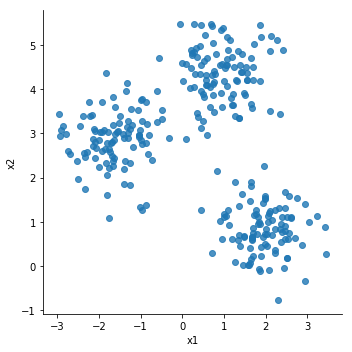

In [13]:
sn.lmplot( "x1", "x2", data=data, fit_reg=False, size = 5 )

### Using K-means clustering technique
k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.

In [14]:
from sklearn.cluster import KMeans

In [15]:
X = data[["x1", "x2"]]
clusters = KMeans(3)  # 3 clusters
clusters.fit( X )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

k-means clustering has figured out the cluster centers and assigned each points to the cluster centers.

In [16]:
clusters.cluster_centers_

array([[-1.60811992,  2.85881658],
       [ 1.95159369,  0.83467497],
       [ 0.95625704,  4.37226546]])

In [17]:
clusters.labels_

array([2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0])

In [18]:
data["clusterid"] = clusters.labels_

In [20]:
data.head()

,x1,x2,y,clusterid
0,0.428577,4.973997,0,2
1,1.619909,0.067645,1,1
2,1.432893,4.376792,0,2
3,-1.578462,3.034458,2,0
4,-1.658629,2.267460,2,0


C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


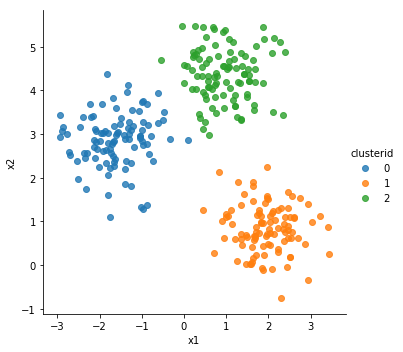

In [21]:
sn.lmplot( "x1", "x2", data=data, hue = "clusterid", fit_reg=False, size = 5 )

### How well the points were clustered?

In [22]:
from sklearn.metrics import adjusted_rand_score

In [23]:
adjusted_rand_score(data.y, data.clusterid)

1.0

### Does the scale of dimensions impact the clustering?

In [24]:
data["x1"] = data.x1 * 100

In [25]:
data.head(5)

,x1,x2,y,clusterid
0,42.857674,4.973997,0,2
1,161.990909,0.067645,1,1
2,143.289271,4.376792,0,2
3,-157.846247,3.034458,2,0
4,-165.862863,2.267460,2,0


In [26]:
X = data[["x1", "x2"]]
clusters = KMeans(3)  # 3 clusters
clusters.fit( X )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
data["clusterid_2"] = clusters.labels_

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


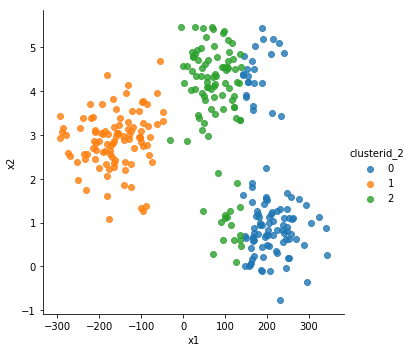

In [28]:
sn.lmplot( "x1", "x2", data=data, hue = "clusterid_2", fit_reg=False, size = 5 )

It seems if the dimensions have different scale, it may impact clsutering as the distance calculated will be dominated by the dimensions with large scale.

So, in clustering the variables need to be scaled or standardized.

### Scale the dimensions to remove the impact

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

In [31]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
data["clusterid_3"] = clusters.labels_

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


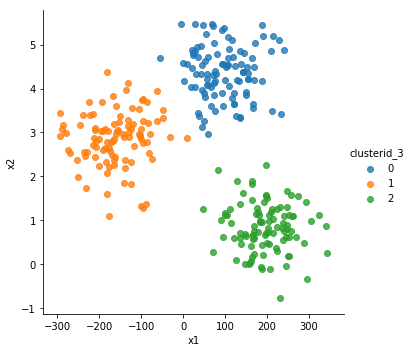

In [33]:
sn.lmplot( "x1", "x2", data=data, hue = "clusterid_3", fit_reg=False, size = 5 )
